## Microsoft Studio Project


* ### Student name: Samwel Kagwi Muiru
* ### Student pace: Full Time
* ### Instructor name: William Okomba
* ### Blog post URL: https://github.com/S-Kagwi/dsc-phase-1-project-v2-4.git


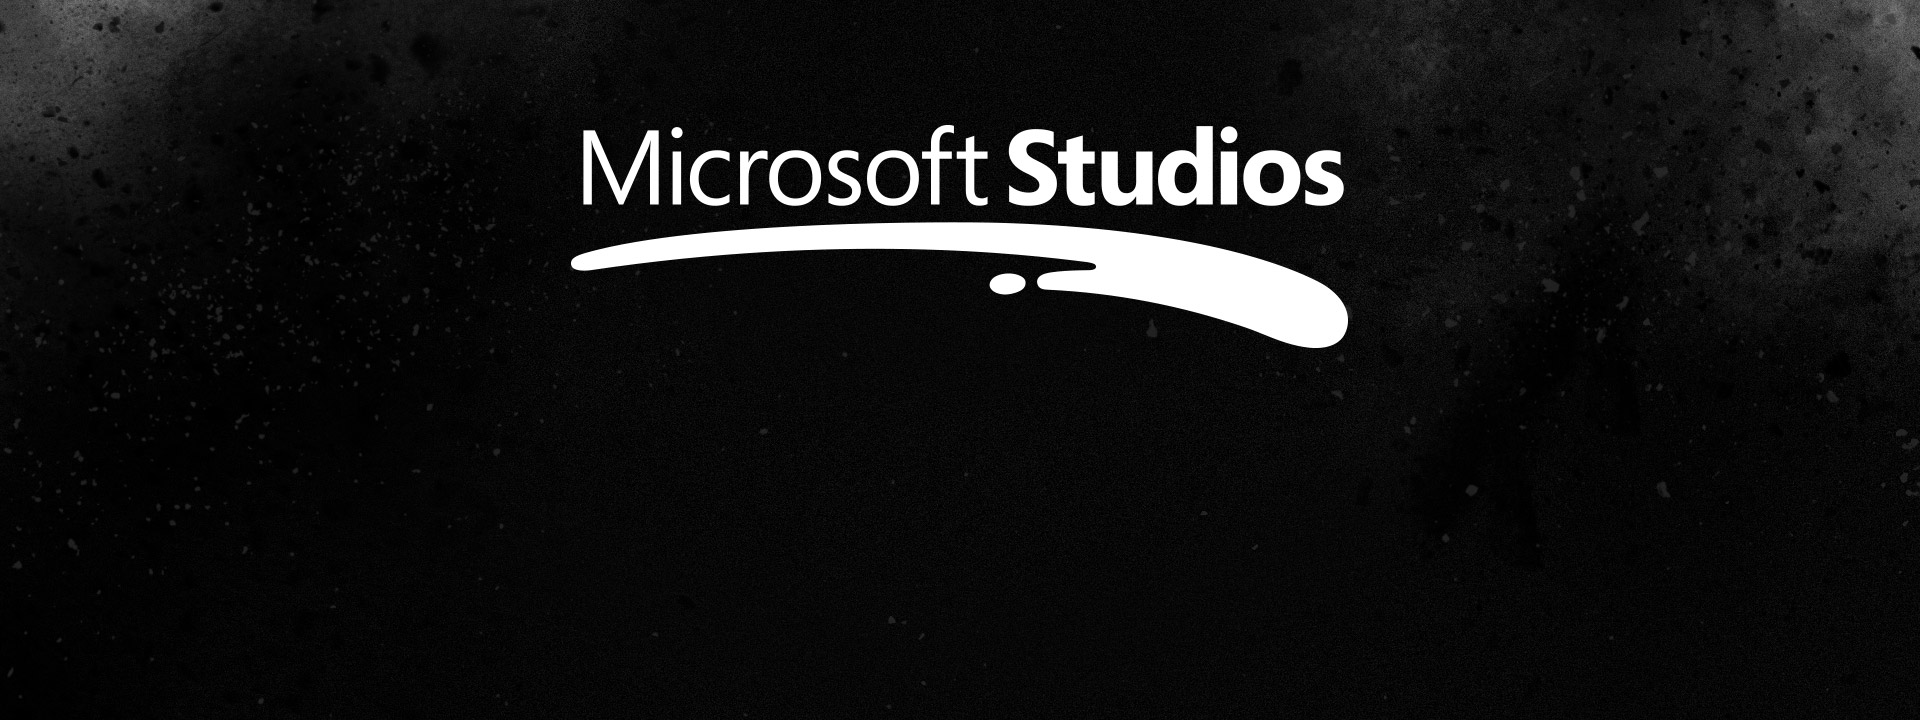

### Business Problem

Microsoft sees all the big companies creating original video content and they have decided to create a new movie studio, but they don't know anything about creating movies. We are charged with exploring what types of films are currently doing the best at the box office. We must then translate those findings into actionable insights that the head of Microsoft's new studio can use to help decide what type of films to create.

### Project Overview

For this project, we will use exploratory data analysis to generate insights for a business stakeholder. The data used was obtained from three renowned movie websites:

Box Office Mojo (https://www.boxofficemojo.com/) - bom.movie_gross.csv

IMDB (https://www.imdb.com/) - im.db

The Numbers (https://www.the-numbers.com/)- tn.movie_budgets.csv

According to the provided datasets, there are different metrics that can be used to gauge the perfomance of a movie. In this analysis, we shall use the following metrics:

Movie Ratings

Return on Investment

Domestic Gross Revenue 

Worldwide Gross Revenue

Number of Votes

#### We start by importing librararies that we will use for data preparation and analysis.

In [1]:
#pandas for data analysis
import pandas as pd

#NumPy for numerical analysis
import numpy as np

# matplotlib and Seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sqlite3 for database management
import sqlite3

# 1. Bom Movie CSV Dataset

### Data Understanding

In [2]:
#we first load the given dataset and view the data
bom_movie = pd.read_csv("bom.movie_gross.csv")
bom_movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
#we check the shape of the data
bom_movie.shape

(3387, 5)

In [4]:
#We use bom_movie.info to get a concise summary of the dataframe.
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
#We use .describe() to calculate the basic summary statistics for each column with numerical data.
bom_movie.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


### Data Cleaning

In [6]:
#we check the column labels of the Dataframe
bom_movie.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [7]:
#we check for duplicated values
bom_movie.duplicated().sum()

0

In [8]:
#we check for any missing data values
bom_movie.isna().any()

title             False
studio             True
domestic_gross     True
foreign_gross      True
year              False
dtype: bool

In [9]:
bom_movie.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

We discover that the 'studio', 'domestic_gross' and 'foreign gross' columns have missing data.

In [10]:
#We drop the 'foreign gross' column due to alot of missing data.
bom_movie.drop("foreign_gross", axis=1, inplace=True)

In [11]:
#We replace the missing values in the domestic gross column with the mean value
mean_bom = bom_movie['domestic_gross'].mean()
bom_movie['domestic_gross'].fillna(mean_bom, inplace = True)

In [12]:
#We replace the missing values in the studio column with the mode value
mode_bom = bom_movie['studio'].mode()[0]
bom_movie['studio'].fillna(mode_bom, inplace = True)

In [13]:
domestic_gross_ = bom_movie.groupby('studio')["domestic_gross"].sum()
domestic_gross_.sort_values(ascending = False).head()

studio
BV      1.841903e+10
Uni.    1.290239e+10
WB      1.216805e+10
Fox     1.094950e+10
Sony    8.488429e+09
Name: domestic_gross, dtype: float64

In [14]:
#we check the summarised data to confirm our changes
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 106.0+ KB


### Data Analysis and Visualization

In [15]:
bom_movie['studio'].value_counts().head(10)

IFC      171
Uni.     147
WB       140
Fox      136
Magn.    136
SPC      123
Sony     110
BV       106
LGF      103
Par.     101
Name: studio, dtype: int64

#### Bar Graph

We plot a bar graph that shows the Top 10 studios based on the domestic gross income.

In [16]:
studio_data = bom_movie.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False)
top_10_studios = studio_data[:10]

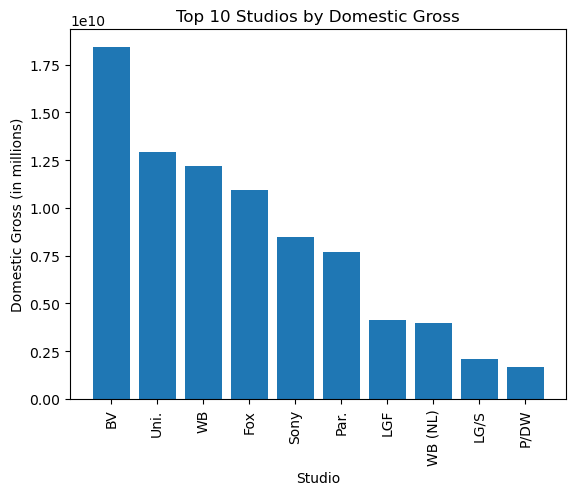

In [17]:
top_10_studios = studio_data[:10]
plt.bar(top_10_studios.index, top_10_studios.values)
plt.xticks(rotation=90)
plt.xlabel('Studio')
plt.ylabel('Domestic Gross (in millions)')
plt.title('Top 10 Studios by Domestic Gross')
plt.show()

Based on the above graph, we can conclude that BV Studios produced movies that had the highest total domestic revenue. We then did a value counts test to see whether BV Studios produced most of the movies, which could then have lead to it having the highest total revenues. However, we found out that IFC produced the highest number of movies, and BV Studios ranked 8th in terms of number of movies produced.

We can advise Microsoft to patner with BV Studios in their movie production. This is because BV Studios generated the highest revenue from movies produced, therefore, patnering with them would likely lead to high revenue income from the movies.

# 2. TN MOVIE BUDGETS FILE

### Data Understanding

In [18]:
#we first load the given dataset and view the data
movie_budgets = pd.read_csv("tn.movie_budgets.csv")
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [19]:
#we check the shape of the data
movie_budgets.shape

(5782, 6)

This data has 5782 rows and 6 columns.

In [20]:
#we check a summary of the data
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


This dataset contains data in the float, interger and object types.

### Data Cleaning

In [21]:
#we check for any duplicated values
movie_budgets.duplicated().sum()

0

In [22]:
#we check for any missing values
movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

There are no duplicated rows in the data set.

In [23]:
#we convert production_budget, domestic_gross and worldwide_gross columns from objects to floats
#we then remove the dollar signs ($) and commas from the values

movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)
movie_budgets

C:\Users\Grey 1\AppData\Local\Temp\ipykernel_11272\1377922522.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\Grey 1\AppData\Local\Temp\ipykernel_11272\1377922522.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\Grey 1\AppData\Local\Temp\ipykernel_11272\1377922522.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expres

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [24]:
#we then verify that the values in the production_budget, domestic_gross and worldwide_gross columns are now float data types
movie_budgets.dtypes

id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

The three highlighted columns likely represent the production budget and revenue figures for each movie, which can be used for financial analysis.

In [25]:
#we preview our data again
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


As seen above, the values in the release_date column are float data type. We have to convert in order to use the data.

In [26]:
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


In [27]:
movie_budgets['year'] = movie_budgets['release_date'].dt.year
movie_budgets['month'] = movie_budgets['release_date'].dt.month
movie_budgets['day'] = movie_budgets['release_date'].dt.day

#we print the updated dataframe
print(movie_budgets)

      id release_date                                        movie  \
0      1   2009-12-18                                       Avatar   
1      2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2      3   2019-06-07                                 Dark Phoenix   
3      4   2015-05-01                      Avengers: Age of Ultron   
4      5   2017-12-15            Star Wars Ep. VIII: The Last Jedi   
...   ..          ...                                          ...   
5777  78   2018-12-31                                       Red 11   
5778  79   1999-04-02                                    Following   
5779  80   2005-07-13                Return to the Land of Wonders   
5780  81   2015-09-29                         A Plague So Pleasant   
5781  82   2005-08-05                            My Date With Drew   

      production_budget  domestic_gross  worldwide_gross  year  month  day  
0           425000000.0     760507625.0     2.776345e+09  2009     12   18  
1    

In [28]:
#We check updated information of the dataset to see the changes that we have made.
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   year               5782 non-null   int64         
 7   month              5782 non-null   int64         
 8   day                5782 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 406.7+ KB


In [29]:
#we check summary statistics data
movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross,year,month,day
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5782.000000,5782.000000
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,2003.967139,7.050675,16.401245
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,12.724386,3.480147,8.803660
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,1915.000000,1.000000,1.000000
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,2000.000000,4.000000,9.000000
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,2007.000000,7.000000,17.000000
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,2012.000000,10.000000,24.000000
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2020.000000,12.000000,31.000000


### Data Analysis and Visualization

#### Histogram

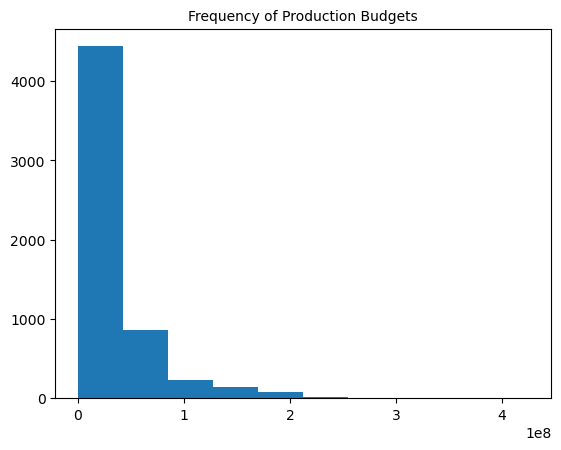

In [30]:
#we check the frequency of production budget for movies
plt.hist(movie_budgets['production_budget'], bins = 10);
plt.title("Frequency of Production Budgets", fontsize=10)
plt.show()

The histogram above shows us that that the frequency of the movie production budget is skewed to the left. As we can see, majority of the production budget lies between 1,000,000 and 100,000,000. We can use this information to give an guidance to Microsoft Studio on the projected budget range for their movies. 

#### Correlation

We check for whether there exists a relationship between the production budget and the worldwide gross revenue of a movie.

In [31]:
correlation_pr_ww = round(movie_budgets['production_budget'].corr(movie_budgets['worldwide_gross']),2)
print("The correlation between production budget and worldwide gross revenue is:", correlation_pr_ww)

The correlation between production budget and worldwide gross revenue is: 0.75


We plot the correlation in a scatter plot.

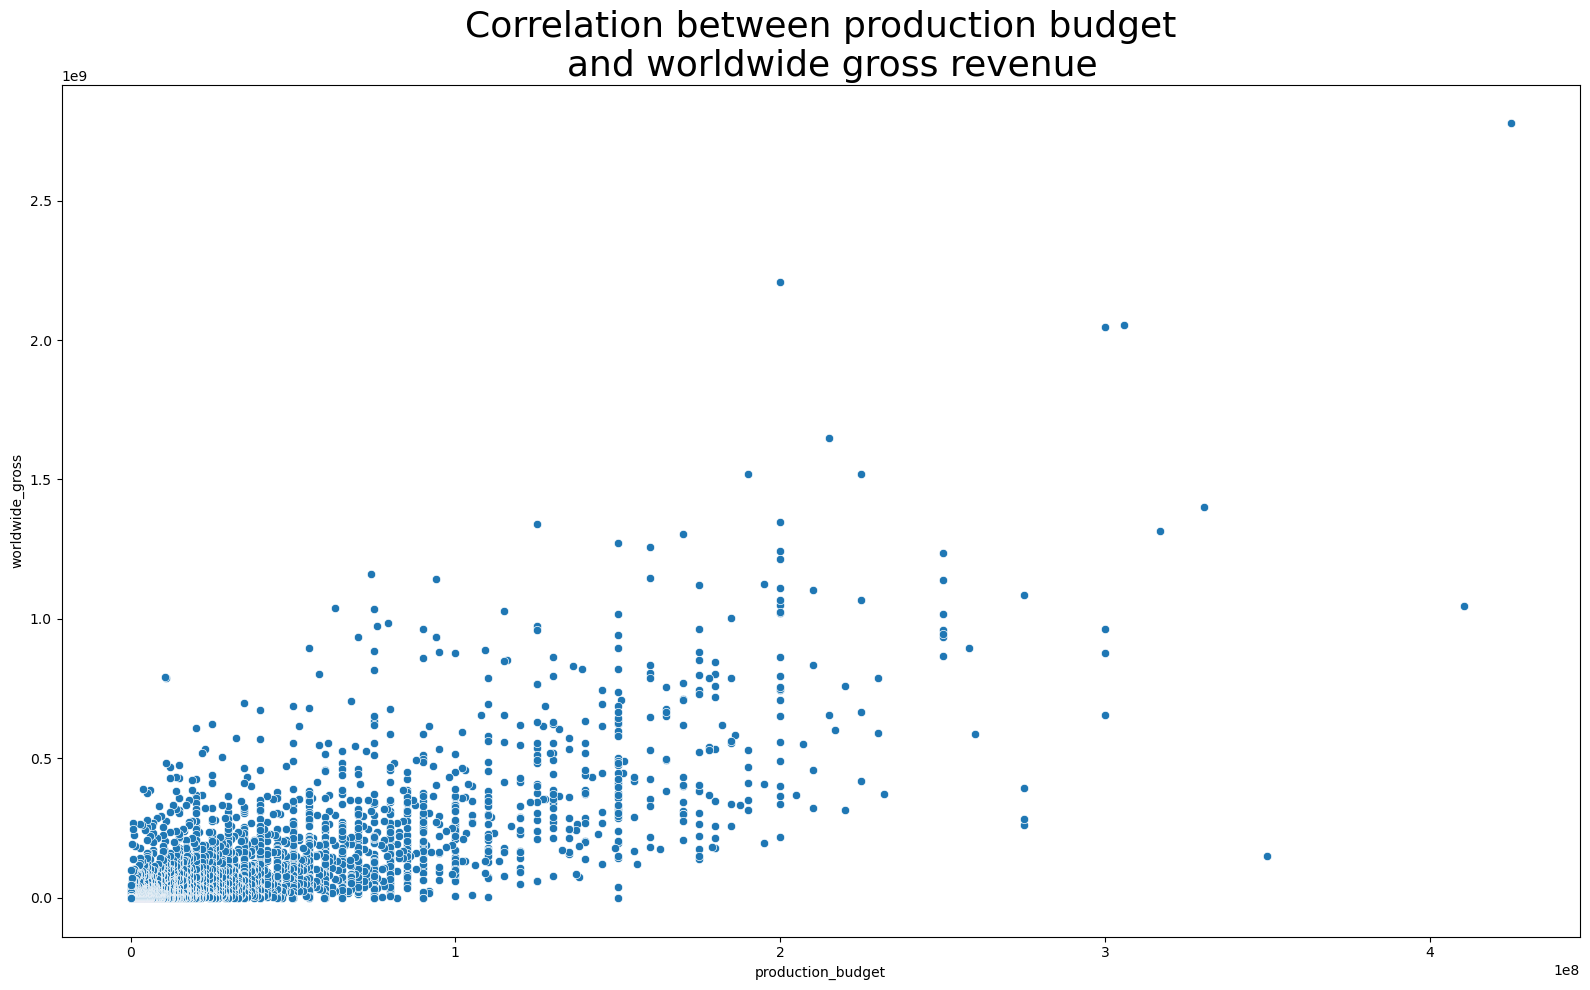

In [32]:
plt.figure(figsize=(16, 10)) 
sns.scatterplot(x='production_budget', y='worldwide_gross', data = movie_budgets,)
plt.title("Correlation between production budget\n  and worldwide gross revenue", fontsize=26)
plt.tight_layout()
plt.show()

Based on the scatter plot, we can see a strong relationship between the production budget and the worldwide gross revenue. It shows that movies with higher production budgets tend to have higher worldwide gross revenue. We can confirm this by looking at the Pearson correlation coefficient (0.75). We see that it is closer to +1, therefore confirming that there is indeed a strong relationship between the production budget and the worldwide gross revenue generated by a movie. 
We can advise Microsoft Studios to consider increasing their production budget as this will likely incease their worldwide gross revenue.

#### Return on Investment

We calculate the return on investment,which is a simple ratio that divides the net profit (or loss) from an investment by its cost. Because it is expressed as a percentage, you can compare the effectiveness or profitability of different investment choices. We check the return on investment of movies, according to the month that they were released.

In [33]:
#calculating and creating a new column in the dataframe named 'Return on Investment'
movie_budgets['return_on_investment'] = ((movie_budgets['worldwide_gross'] - movie_budgets['production_budget']) / movie_budgets['production_budget']) * 100
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,day,return_on_investment
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12,18,553.257713
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5,20,154.667286
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6,7,-57.210757
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5,1,324.384139
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12,15,315.369636


In [34]:
# Create a new column that contains the month that the movies were released
release_time = movie_budgets.copy()

release_time['release_month'] = release_time["release_date"].dt.strftime('%B').astype(str)
# we preview the updated DataFrame
release_time.head(10) 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,day,return_on_investment,release_month
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12,18,553.257713,December
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5,20,154.667286,May
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6,7,-57.210757,June
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5,1,324.384139,May
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12,15,315.369636,December
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015,12,18,571.016739,December
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,4,27,582.711400,April
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08,2007,5,24,221.140142,May
8,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017,11,17,118.648403,November
9,10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,2015,11,6,193.206974,November


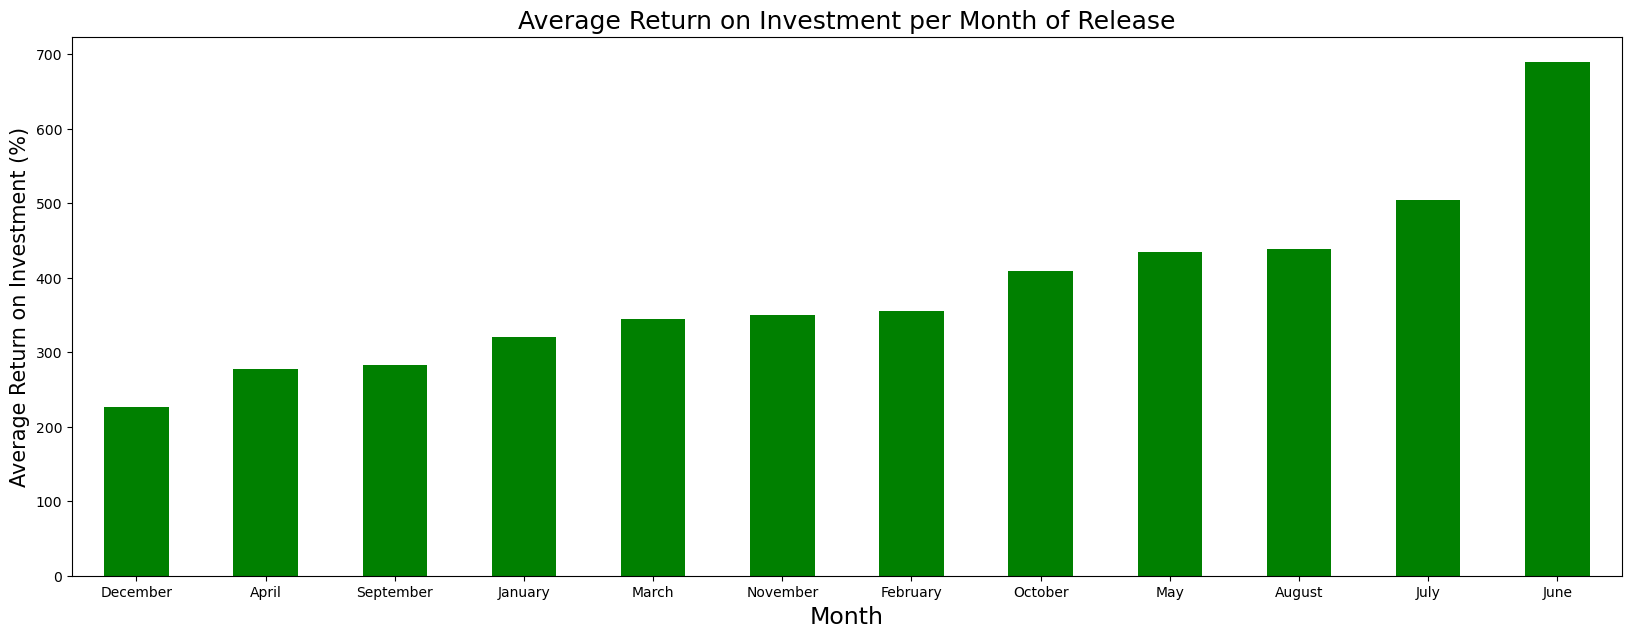

In [35]:
# Create a plot that shows average return on investment by month
fig, ax = plt.subplots(figsize=(20,7))
release_time.groupby('release_month')['return_on_investment'].mean().sort_values().plot(kind='bar', color='green')
ax.set_xlabel('Month', fontsize=17)
plt.xticks(rotation=0)
ax.set_ylabel('Average Return on Investment (%)', fontsize=15)
ax.set_title('Average Return on Investment per Month of Release', fontsize=18);

Although there is a positive correlation between production budget and worldwide gross revenue, it is important to examine the return on investment (ROI) of a movie. We then further examine the return on investment of a movies, based on the month that they were produced.
Based on our analysis of the ROI by month produced, we would recommend that Microsoft release their movie during the months of June and July, especially July. This is because it is during these months that they can generate the highest returns on their investment in the movie.



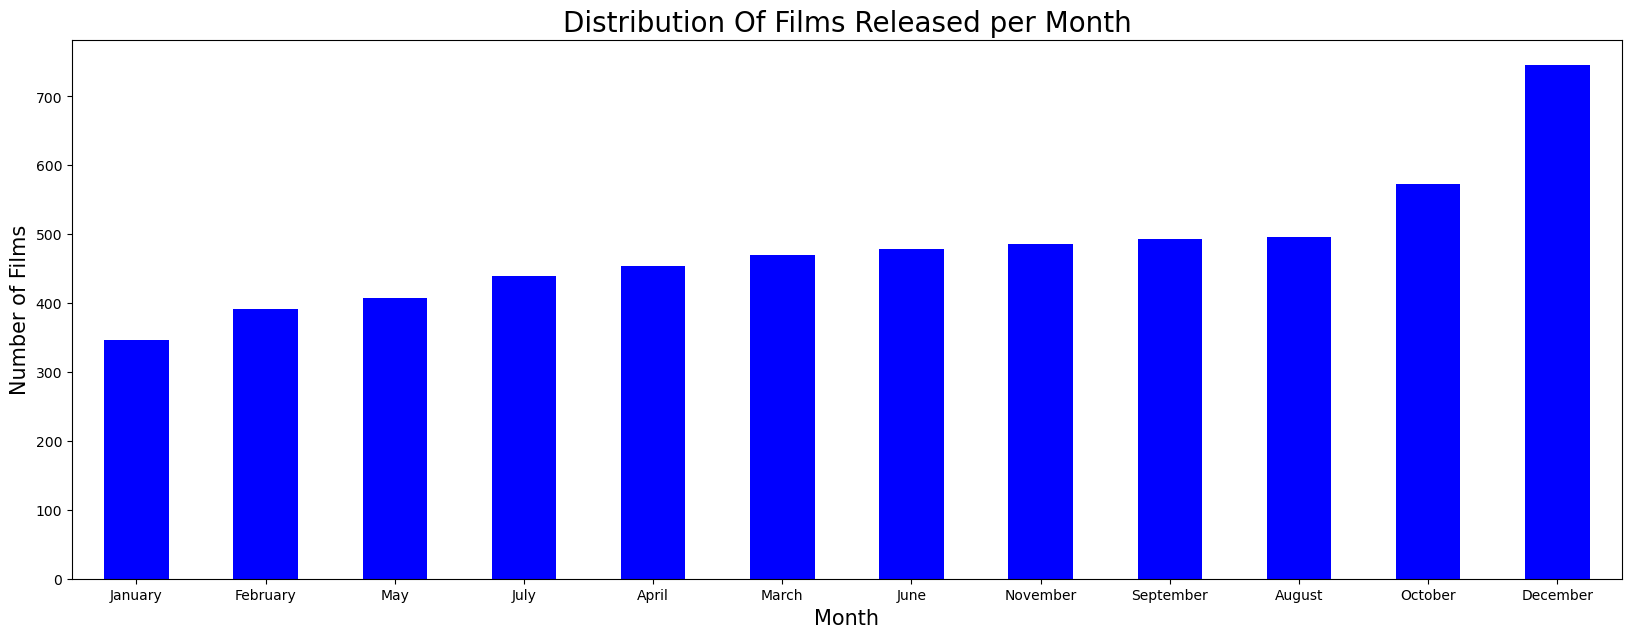

In [36]:
# Create a plot that shows the number of films released each month
fig, ax = plt.subplots(figsize=(20,7))
release_time.groupby('release_month')['movie'].count().sort_values().plot(kind='bar', color='blue')
ax.set_xlabel('Month', fontsize=15)
plt.xticks(rotation=0)
ax.set_ylabel('Number of Films', fontsize=15)
ax.set_title('Distribution Of Films Released per Month', fontsize=20);

We observe that the month of December had the highest number of movies produced, followed by October. Howerver, this did not translate to the highest return on investment, as seen in the earlier graph.

# 3. IMDB file

The ERD (Entity Relation Diagram) for this database is shown below:

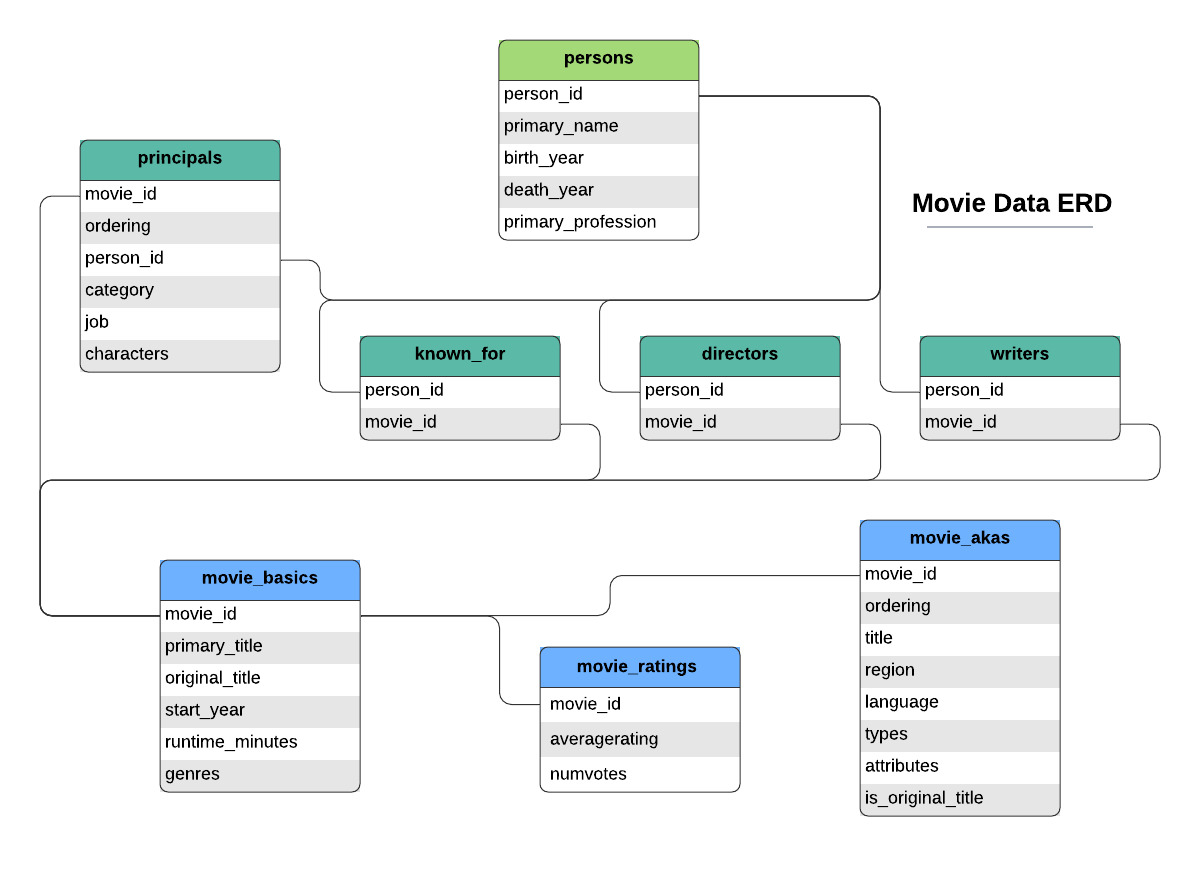

### Data Understanding

In [37]:
#connect to the database
conn = sqlite3.connect("im.db")

In [38]:
#import data from the movie_basics table
imdb_basics = pd.read_sql("""
SELECT *
FROM movie_basics
""", conn)
imdb_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [39]:
imdb_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


The table contains object, float and integer as data types.

In [40]:
#import data from the movie_ratings table
imdb_ratings = pd.read_sql("""
SELECT *
FROM movie_ratings
""", conn)
imdb_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [41]:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


The table contains object, float and integer as data types.

In [42]:
#We then join the two tables using a unique identifier (movie_id) that is present in both tables
imdb = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
USING(movie_id);
""", conn)
imdb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [43]:
#We use info() to get a concise summary of the dataframe
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


The joined table contains object, float and integer as data types.

### Data Preparation

In [44]:
#we check for missing values in the data
imdb.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

This means that the data set has 7,620 missing values in  the runtime_minutes column and 804 missing values in the genres column.

In [45]:
#we check for any duplicated rows
imdb.duplicated().sum()

0

There are no duplicated rows in the data.

In [46]:
#Since the 'genre' column is categorical data, we replace the missing values with the mode (most-occurring value)
imdb['genres'].mode()[0]

'Drama'

In [47]:
#we confirm that drama is the mode of the 'genre' column
imdb['genres'].value_counts()

Drama                        11612
Documentary                  10313
Comedy                        5613
Horror                        2692
Comedy,Drama                  2617
                             ...  
Sport,Thriller                   1
Comedy,Sport,Western             1
Action,Music                     1
Comedy,Sci-Fi,Western            1
Documentary,Family,Sci-Fi        1
Name: genres, Length: 923, dtype: int64

In [48]:
#We replace the missing values in the genres column with the most-occuring genre (drama).
#We define a variable then run

imdb_mode = imdb['genres'].mode()[0]
imdb['genres'].fillna('imdb_mode', inplace = True)

In [49]:
#replace the missing values in the runtime_minutes column with the mean value.
#define a variable then run

imdb_mean = imdb['runtime_minutes'].mean()
imdb['runtime_minutes'].fillna('imdb_mean', inplace = True)

In [50]:
#check a summary of the data to confirm the changes
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  73856 non-null  object 
 5   genres           73856 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 4.5+ MB


In [51]:
#we check again for any missing data
imdb.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

### Data Analysis and Visualization

In [52]:
im_db = pd.read_sql("""
                  SELECT primary_title, start_year, genres, averagerating, numvotes
                  FROM movie_basics AS MB
                  JOIN movie_ratings AS MR
                   ON MB.movie_id = MR.movie_id
                   WHERE numvotes > 1000000 AND averagerating BETWEEN 6.5 AND 9.0
                   ORDER BY numvotes DESC
                   limit 50;
                  """, conn)

In [53]:
genres_sorted_mean = pd.DataFrame(im_db.groupby("genres")["numvotes"].mean()).sort_values(by="numvotes", ascending= False).head(10)
genres_sorted_mean

,numvotes
genres,
"Action,Adventure,Sci-Fi",1512360.5
"Action,Thriller",1387769.0
"Adventure,Drama,Sci-Fi",1299334.0
"Drama,Western",1211405.0
"Biography,Crime,Drama",1035358.0
"Mystery,Thriller",1005960.0


#### Bar Graph

We plot a bar graph to determine the most popular movie genres based on the number of votes that they received.

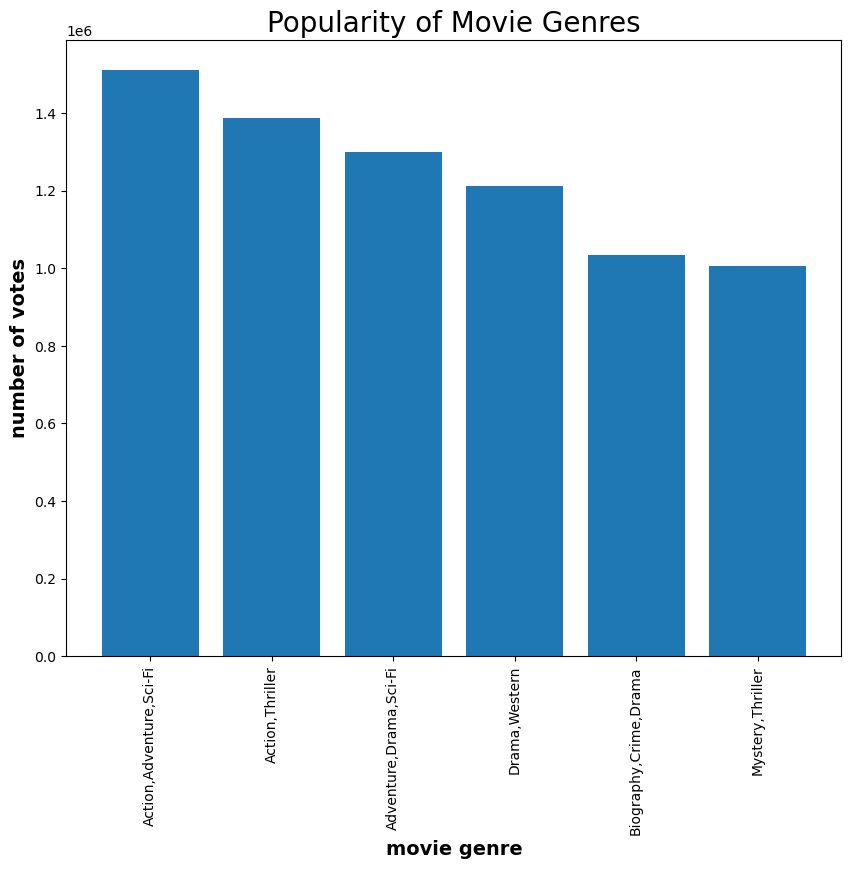

In [54]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90, fontsize=10)
y = genres_sorted_mean["numvotes"]
plt.xlabel("movie genre", fontsize=14, fontweight='bold')
plt.ylabel("number of votes", fontsize =14, fontweight= 'bold')
plt.title('Popularity of Movie Genres', fontsize=20);
plt.bar(y.index, y.values);

The bar graph above shows us the combination of the most popular movie genres based on the number of votes they received.The graph can be useful in identifying which movie genres are more popular among users, which can be helpful in making decisions related to marketing and distribution of movies. We can therefore recommend that Micosoft Studios produce a movie with the combination of Action, Adventure and Sci-Fi. This will likely make the movie very popular. 

# Findings

This analysis leads us to the following findings and recommendations for the upcoming Microsoft Studios:

1. BV Studios had the highest revenues generated by movies produced. Microsoft Studios should consider patnering with them.

2. Movies with a combination of Action, Adventure and Sci-Fi genres were the most popular. Microsoft should produce a movie with this combination of genres.

3. Releasing movies in June and July would likely lead to the highest return on investment by the movie. Microsoft Studios should relase movies in June especially.

4. A majority of production budgets lies between 1,000,000$ and 100,000,000$. This should be the projected budget for the movie.

5. The production budget of a movie has a strong impact on the gross revenue generated by the movie. Notwithstanding no.4 above, Microsoft Studios should consider inceasing their production budget.

6. December has the highest number of movies released.